## Day 5 working lunch exercise


You have 2 hours to complete this excercise. You may work together but each student should turn in their own copy of the exercise. We will grade on effort so please do your best to answer all the questions and work together!

Create a Python notebook to run and document your analysis. You can start with this notebook, or from another existing notebook. When finished, export the notebook and submit it to Blackboard.

1. The half-life of P-32 radioactive isotope is 14.32 days. If you receive a vial of P32 containing 1000 atoms, how many atoms do you have left after 7 days? Plot the radioactive decay function and calculate number of remaining atoms at 7 days. 

In [1]:
##to get you started
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plot

##using the half-life given to calculate the rate of decay
k = math.log(2)/14.32
k 

0.04840413272066657

In [2]:
def decay(t,N):
    rate = -k*N
    return rate

P_solver=solve_ivp(decay,t_span=[0,7],y0=[1000])
P_solver

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.832e-01  2.016e+00  7.000e+00]
        y: [[ 1.000e+03  9.912e+02  9.070e+02  7.126e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 20
     njev: 0
      nlu: 0

In [3]:
print(P_solver.y[0][-1])

712.6044026819314


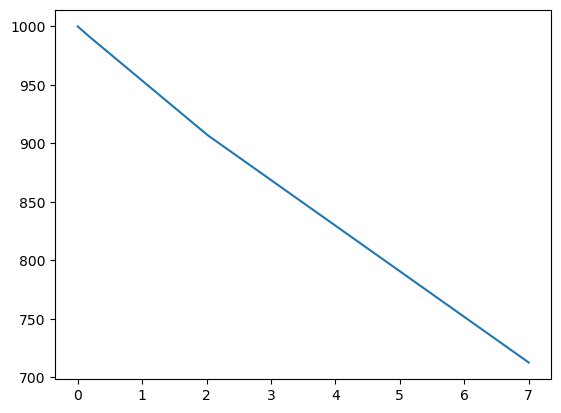

In [4]:
plot.plot(P_solver.t,P_solver.y[0])

Answer: After 7 days, about 712 atoms are left.

2. You are tracking the growth of two bacterial strains over time. You notice that the two strains grow slightly differently, but what affect does strain have on the doubling time? To answer this, you will need to:
a) Tidy the following dataset and plot growth of the two samples
b) Fit a curve of exponential growth to the dataset
c) Use this curve to estimate growth rate and compare between the two. 

Data is in the file `TECANgrowth.csv`

In [5]:
import pandas as pd

growth = pd.read_csv('/home/fzhong3/bcmb_bootcamp/day4/data/TECANgrowth.csv')
growth

,Unnamed: 0,0,10,20,30,40,50,60,70,80,...,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390
0,WT_0,0.2010,0.2165,0.2298,0.2429,0.2606,0.2809,0.3113,0.3467,0.3684,...,0.5284,0.5270,0.5273,0.5290,0.5267,0.5300,0.5287,0.5295,0.5328,0.5276
1,kd_0,0.1922,0.1970,0.2044,0.2122,0.2185,0.2297,0.2463,0.2661,0.2945,...,0.4359,0.4368,0.4374,0.4375,0.4362,0.4411,0.4380,0.4385,0.4374,0.4383


In [6]:
growth = growth.rename({"Unnamed: 0" : "strain"},axis='columns')
growth

,strain,0,10,20,30,40,50,60,70,80,...,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390
0,WT_0,0.2010,0.2165,0.2298,0.2429,0.2606,0.2809,0.3113,0.3467,0.3684,...,0.5284,0.5270,0.5273,0.5290,0.5267,0.5300,0.5287,0.5295,0.5328,0.5276
1,kd_0,0.1922,0.1970,0.2044,0.2122,0.2185,0.2297,0.2463,0.2661,0.2945,...,0.4359,0.4368,0.4374,0.4375,0.4362,0.4411,0.4380,0.4385,0.4374,0.4383


In [7]:
growth_clean=growth.melt(id_vars='strain')
growth_clean=growth_clean.rename({'variable':'time'},axis='columns')
growth_clean['time']=pd.to_numeric(growth_clean['time'])
growth_clean

,strain,time,value
0,WT_0,0,0.2010
1,kd_0,0,0.1922
2,WT_0,10,0.2165
3,kd_0,10,0.1970
4,WT_0,20,0.2298
...,...,...,...
275,kd_0,1370,0.4385
276,WT_0,1380,0.5328
277,kd_0,1380,0.4374
278,WT_0,1390,0.5276


In [8]:
import plotnine as p9
import matplotlib.pyplot as plt

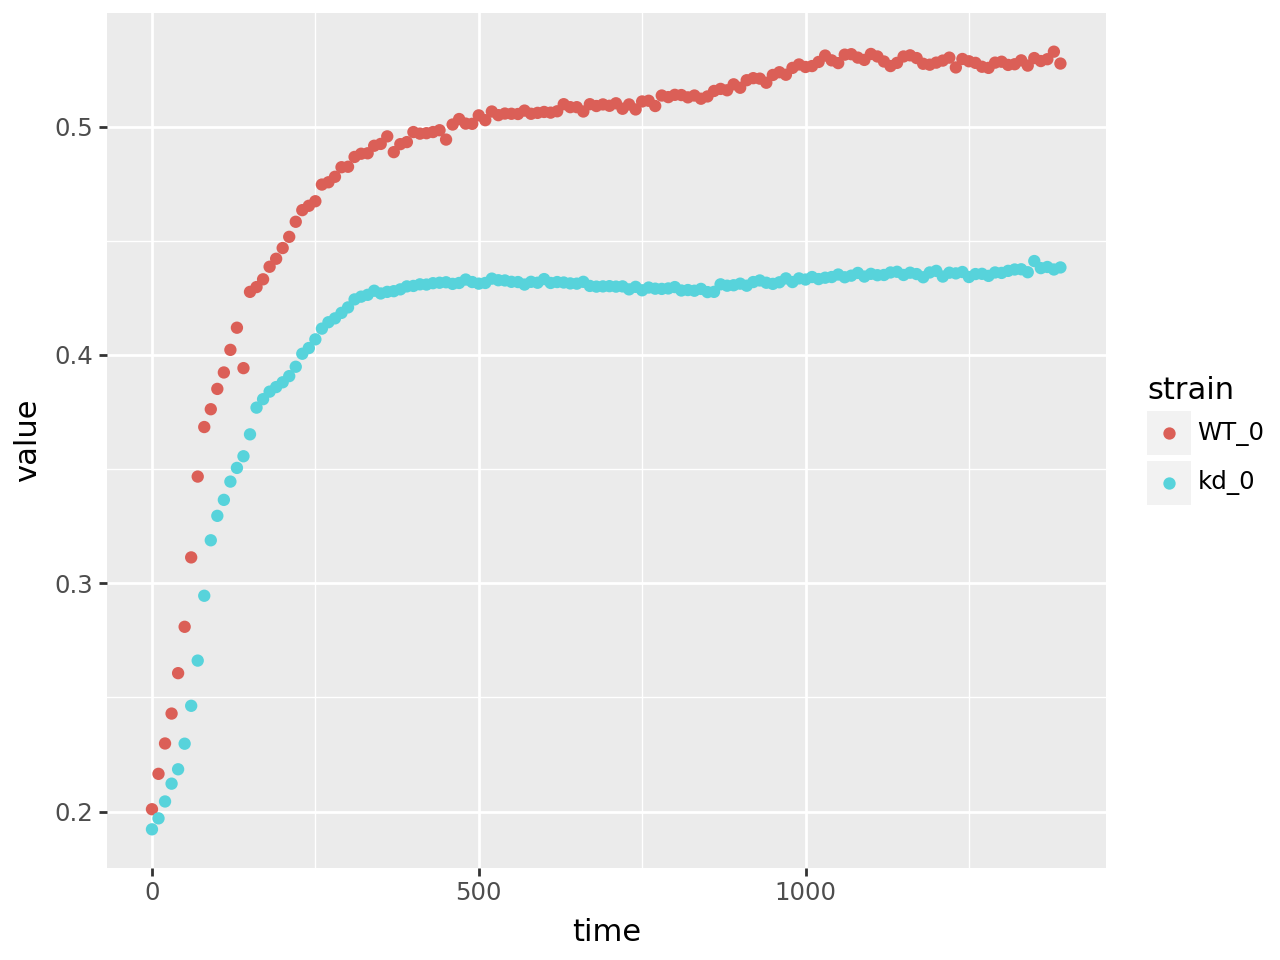

In [9]:
p9.ggplot(data=growth_clean,mapping=p9.aes(x='time',y='value',color='strain'))+p9.geom_point()

In [10]:
growth_wt = growth_clean[growth_clean['strain']=='WT_0']
growth_kd = growth_clean[growth_clean['strain']=='kd_0']

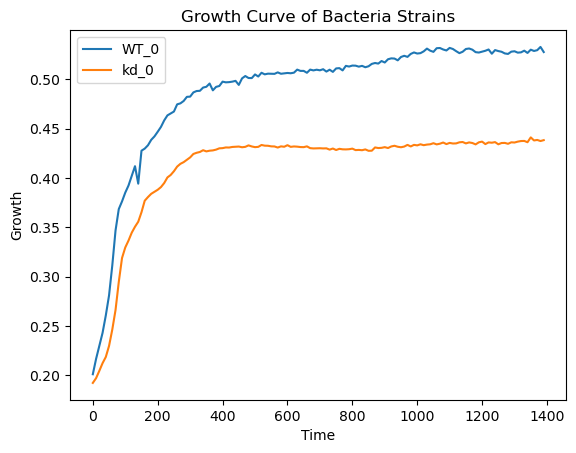

In [11]:
plt.plot(growth_wt['time'],growth_wt['value'])
plt.plot(growth_kd['time'],growth_kd['value'])
plt.legend(growth.iloc[:,0])
plt.xlabel('Time')
plt.ylabel('Growth')
plt.title('Growth Curve of Bacteria Strains')
plt.show()

In [12]:
from scipy import optimize
import numpy as np

In [13]:
def strain_growth(t, r, c):
    N = c + r * np.log(t)
    return N


params_wt, covariance_wt = optimize.curve_fit(strain_growth,growth_wt['time'][1:],growth_wt['value'][1:])
params_kd, covariance_kd = optimize.curve_fit(strain_growth,growth_kd['time'][1:],growth_kd['value'][1:])

In [14]:
print(params_wt,params_kd)

[0.06296468 0.09564567] [0.0476856  0.11426121]


/home/fzhong3/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log


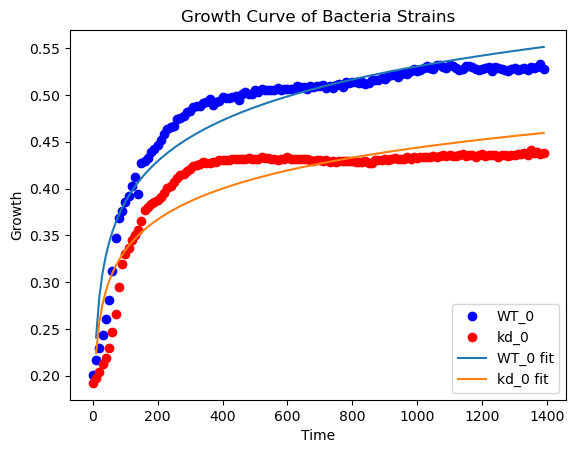

In [15]:
plt.plot(growth_wt['time'],growth_wt['value'],'bo')
plt.plot(growth_kd['time'],growth_kd['value'],'ro')
plt.plot(growth_wt['time'],params_wt[0]*np.log(growth_wt['time'])+params_wt[1])
plt.plot(growth_kd['time'],params_kd[0]*np.log(growth_kd['time'])+params_kd[1])
plt.legend(['WT_0','kd_0','WT_0 fit','kd_0 fit'])
plt.xlabel('Time')
plt.ylabel('Growth')
plt.title('Growth Curve of Bacteria Strains')
plt.show()

In [16]:
r_wt = (params_wt[0])
r_kd = (params_kd[0])
print(f"Growth rate constant of WT_0 is {r_wt}")
print(f"Growth rate constant of kd_0 is {r_kd}")

Growth rate constant of WT_0 is 0.06296467877586354
Growth rate constant of kd_0 is 0.047685603259570615
